Attribute Information:

1.) Area: Gives the number of pixels within the boundaries of the raisin. 
2.) Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3.) MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4.) MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5.) Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins. 
6.) ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7.) Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8.) Class: Kecimen and Besni raisin.

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

data=pd.read_excel('Raisin_Dataset.xlsx')

data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [98]:
#데이터타입 확인
type(data)

pandas.core.frame.DataFrame

In [99]:
#결측치확인
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Text(0.5, 1.0, 'Label')

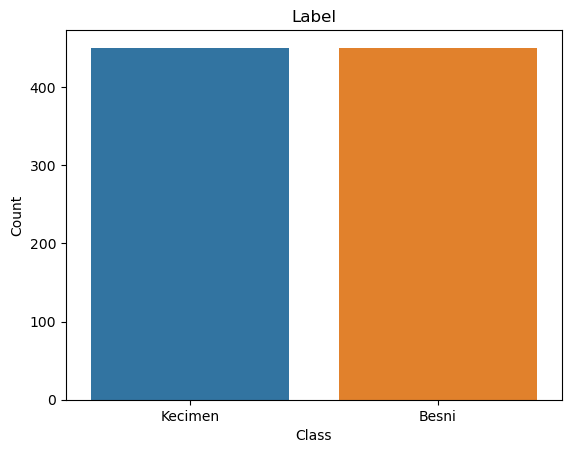

In [100]:
#EDA 수행
sns.countplot(data = data, x="Class")
plt.ylabel("Count")
plt.title("Label")

In [101]:
#X, Y(Class) splitting
X = data.iloc[:,0:6].values
y = data.iloc[:,7].values
    
#원핫 인코딩.
Y = pd.get_dummies(y).values

In [102]:
X

array([[8.75240000e+04, 4.42246011e+02, 2.53291155e+02, 8.19738392e-01,
        9.05460000e+04, 7.58650579e-01],
       [7.51660000e+04, 4.06690687e+02, 2.43032436e+02, 8.01805234e-01,
        7.87890000e+04, 6.84129570e-01],
       [9.08560000e+04, 4.42267048e+02, 2.66328318e+02, 7.98353619e-01,
        9.37170000e+04, 6.37612812e-01],
       ...,
       [9.96570000e+04, 4.31706981e+02, 2.98837323e+02, 7.21684066e-01,
        1.06264000e+05, 7.41098519e-01],
       [9.35230000e+04, 4.76344094e+02, 2.54176054e+02, 8.45738510e-01,
        9.76530000e+04, 6.58798253e-01],
       [8.56090000e+04, 5.12081774e+02, 2.15271976e+02, 9.07345395e-01,
        8.91970000e+04, 6.32019963e-01]])

In [103]:
Y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [104]:
#Splitting the data into training and test test
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [105]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 42        
                                                                 
 dense_33 (Dense)            (None, 6)                 42        
                                                                 
 dense_34 (Dense)            (None, 6)                 42        
                                                                 
 dense_35 (Dense)            (None, 2)                 14        
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [106]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100


23/23 [==============================] - 1s 12ms/step - loss: 6937.9722 - accuracy: 0.4903 - val_loss: 4856.4956 - val_accuracy: 0.5389
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 3364.8809 - accuracy: 0.4903 - val_loss: 1623.6542 - val_accuracy: 0.5389
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 939.6745 - accuracy: 0.4889 - val_loss: 258.1639 - val_accuracy: 0.4778
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 179.8536 - accuracy: 0.4958 - val_loss: 76.7278 - val_accuracy: 0.5444
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 54.4544 - accuracy: 0.5667 - val_loss: 60.1727 - val_accuracy: 0.5667
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 48.6900 - accuracy: 0.5722 - val_loss: 57.7251 - val_accuracy: 0.5667
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 48.5176 - accuracy: 0.5708 - val_loss: 56.5753 - val_accuracy: 0.5722

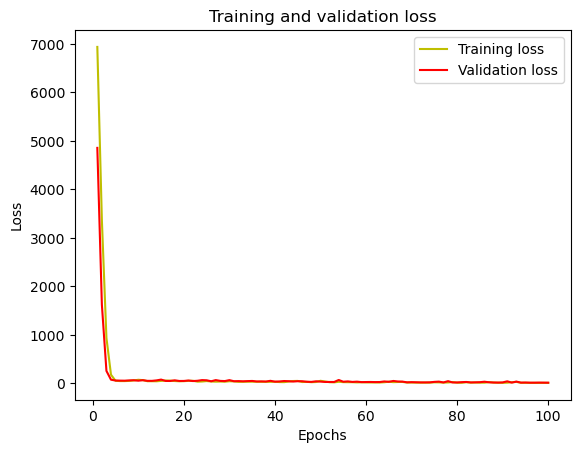

In [107]:
#시각화

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

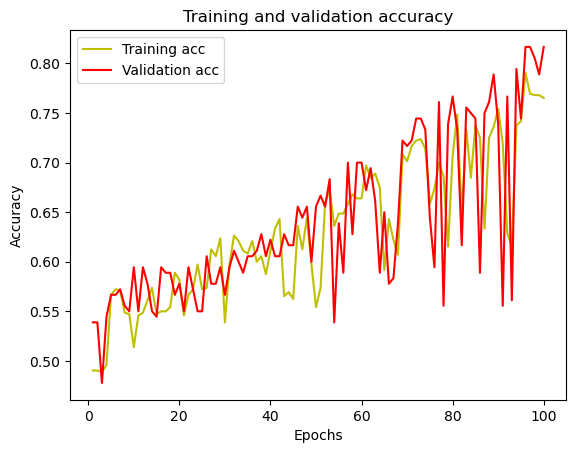

In [108]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [109]:
#성능평가

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        97
           1       0.82      0.76      0.79        83

    accuracy                           0.81       180
   macro avg       0.81      0.81      0.81       180
weighted avg       0.81      0.81      0.81       180

[[83 14]
 [20 63]]
